In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from math import isnan

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [2]:
bram_df = pd.read_csv("../testbench_results/up5k_bram.csv")
spram_df = pd.read_csv("../testbench_results/up5k_spram.csv")

modes = ('BRAM', 'SPRAM')
means = {
    'Read': (
        bram_df[bram_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        spram_df[spram_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
    ),
    'Write': (
        bram_df[bram_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        spram_df[spram_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
    ),
}

print(means)

{'Read': (3196.4200803212852, 3045.682778229082), 'Write': (1498.884860557769, 1469.2738376674547)}


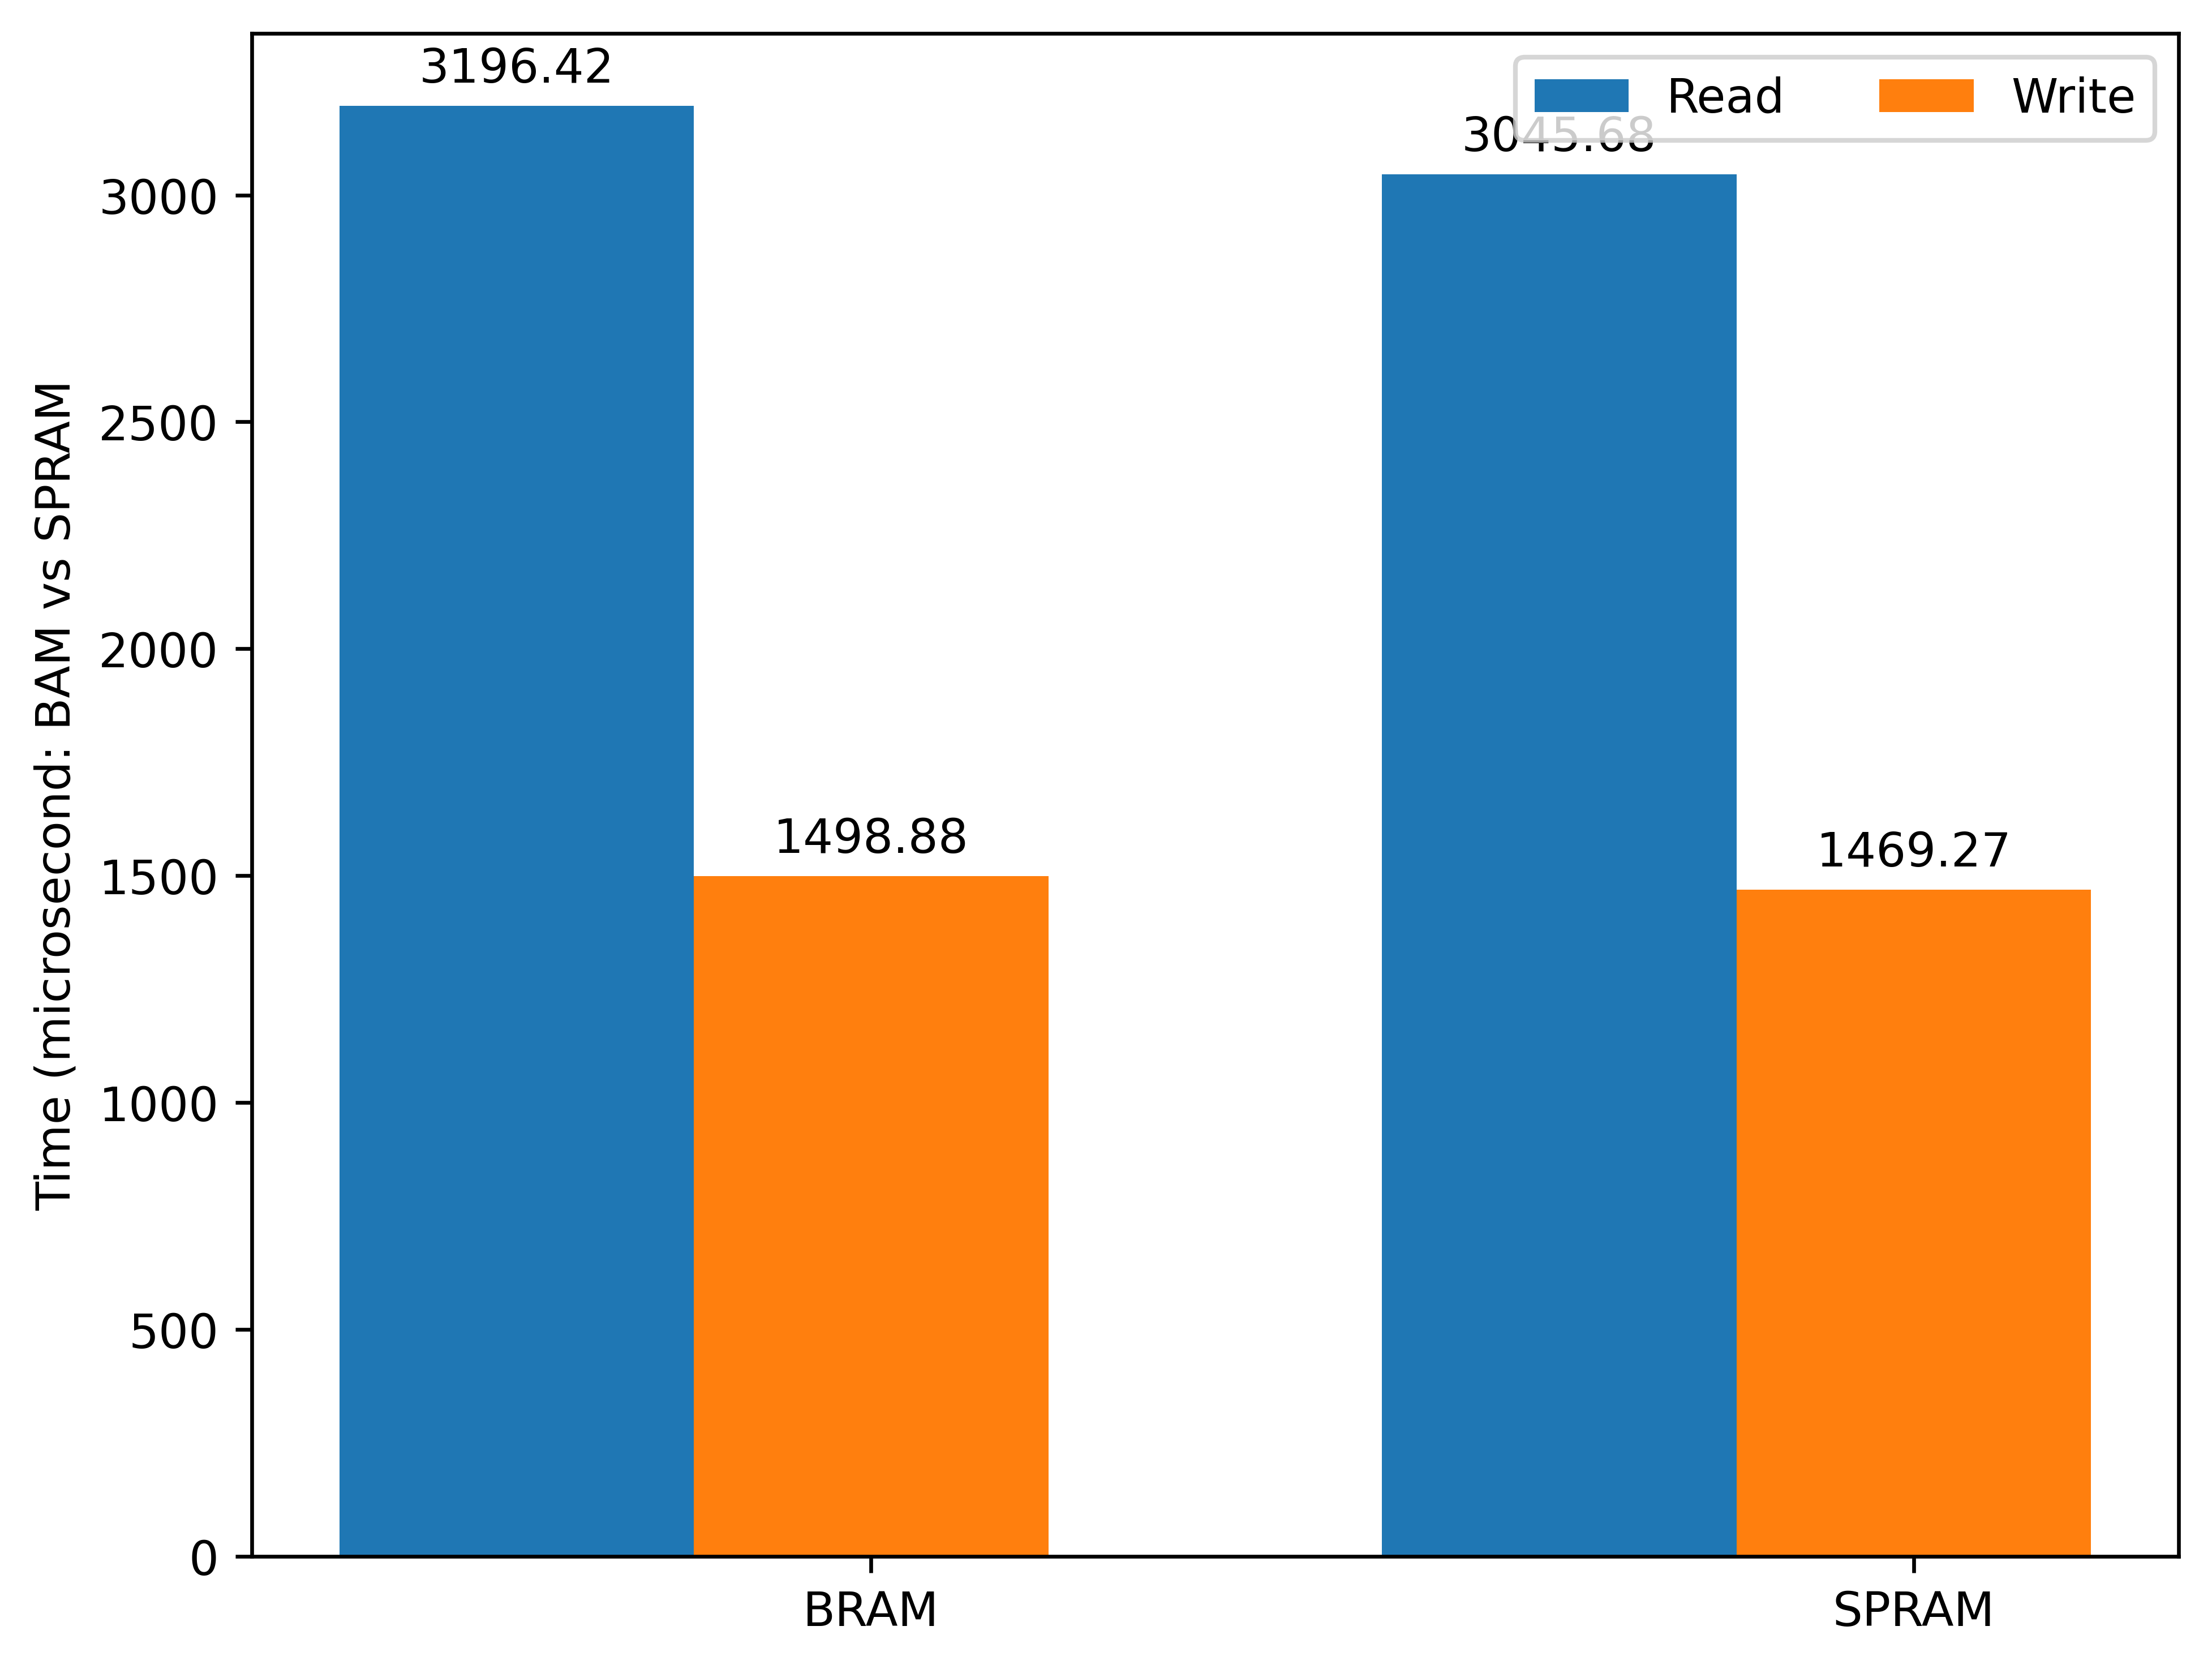

In [4]:
x = np.arange(len(modes))  # the label locations
width = 0.34  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', dpi=600)

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (microsecond: BAM vs SPRAM')
ax.set_xticks(x + width, modes)
ax.legend(loc='upper right', ncols=2)

plt.show()